### Load dataset

In [3]:
import pandas as pd
import os

PATH = "./"

def load_housing_data(path=PATH):
    '''function that returns a pandas dataframe for the housing data based on path'''
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)

#create housing dataset
housing_data = load_housing_data()

#load first 5 rows
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Overview of data

In [7]:
#quick info
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [8]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#check columns
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

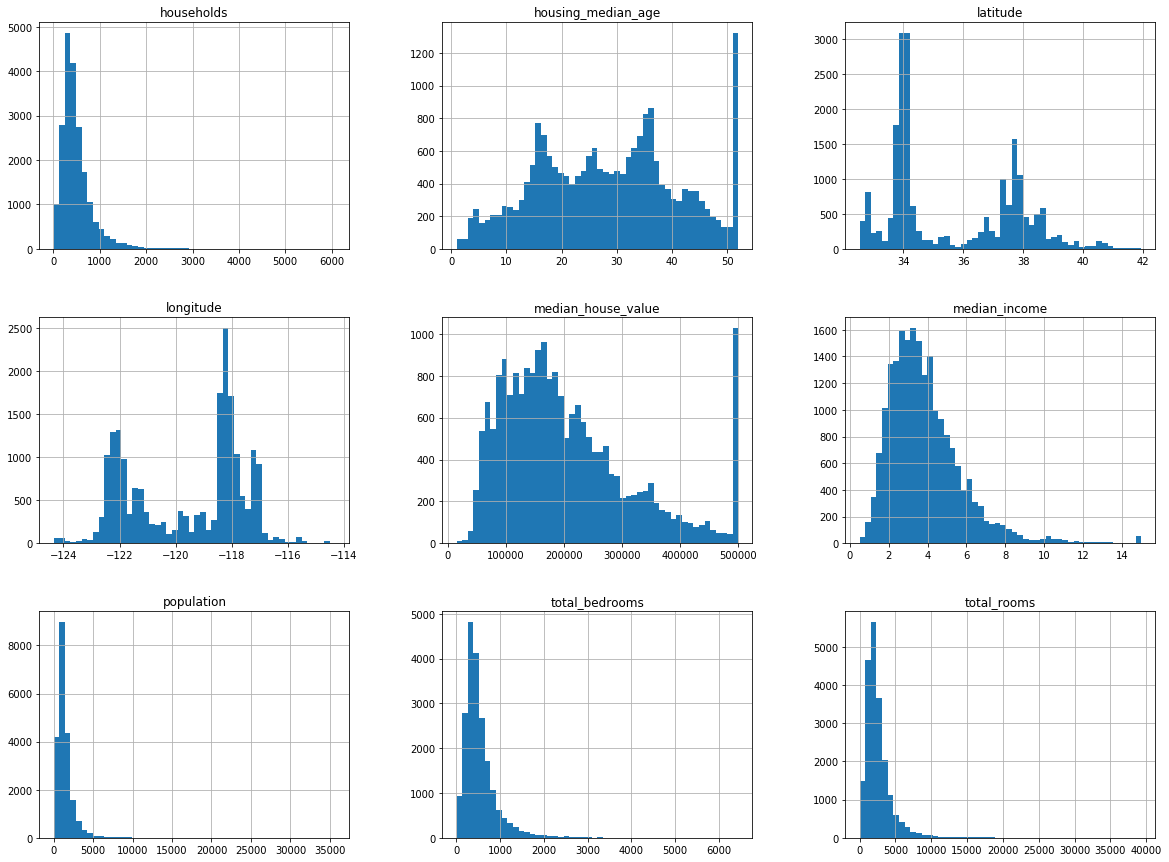

In [11]:
#graph of trends of numerical attributes
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

### Split data into train and test

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(housing_data,test_size = 0.2, random_state = 42)

### Categorize income

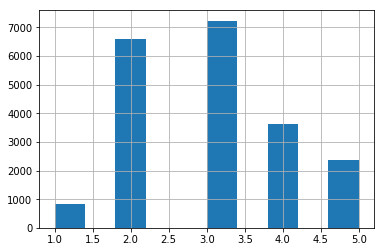

In [17]:
import numpy as np

#create new column with groups
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

#plot income categories
housing_data["income_cat"].hist()

### Startified sampling based on income categories

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

#initialize train and test sets
strat_train,strat_test = None, None

#create split indices group
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=55)

#create train and test sets 
for train_index,test_index in split.split(housing_data, housing_data['income_cat']):
    strat_train = housing_data.loc[train_index]
    strat_test = housing_data.loc[test_index]

In [20]:
#drop categorical variable
for dataset in (strat_train, strat_test):
    dataset.drop('income_cat',axis=1,inplace=True)

### Explore Data

In [21]:
#create data copy
housing_copy = housing_data.copy()

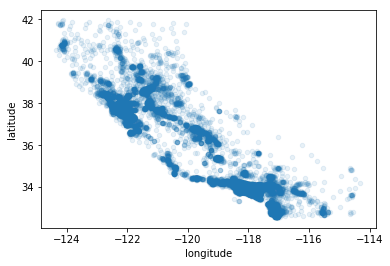

In [22]:
## visualize high density areas
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

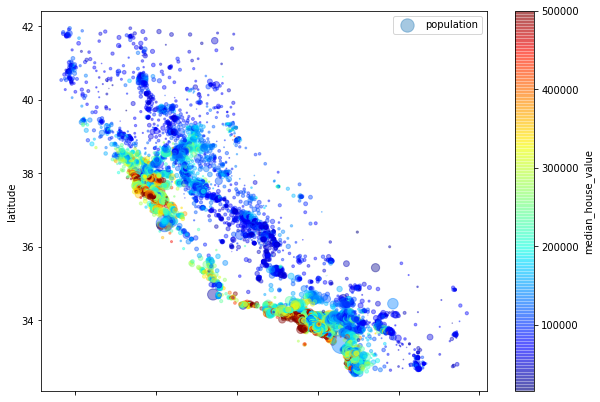

In [28]:
import matplotlib.pyplot as plt 

housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=housing_copy["population"]/100, label="population", 
                  figsize=(10,7),c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

### Find correlation of attributes with housing value

In [27]:
#compute corr matrix 
corr_matrix = housing_copy.corr()

#check attribute correlation with housing value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

This shows that the value of the house has some correlation with income, rooms and age.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1AAF3EF0>,
      dtype=object)

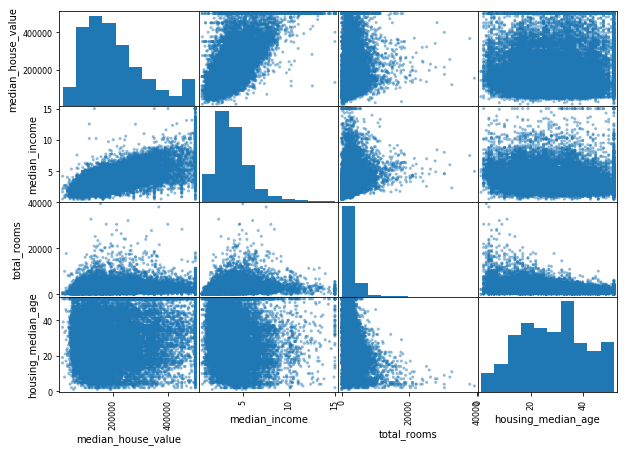

In [30]:
#create a correlation scatter plot matrix of the variables that show a promising correlation trend
from pandas.plotting import scatter_matrix

#create a list of the more correlated variables
promising_attributes = ['median_house_value','median_income','total_rooms','housing_median_age']

#plot the scatter matrix
scatter_matrix(housing_copy[promising_attributes],figsize=(10,7))

The scatter plot for median house value with median income shows a strong trend

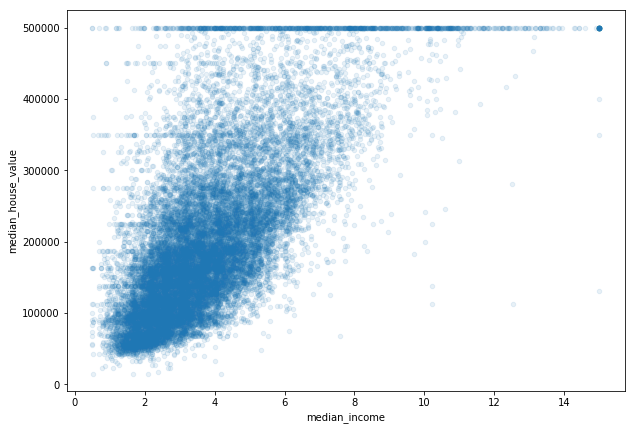

In [35]:
housing_copy.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1, figsize=(10,7))